In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from kervis.utils import Dataset, create_models
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, GraphletSampling, WeisfeilerLehman

In [4]:
def get_accuracy(models):
    results = []
    for model in models:
        results.append([model.name, model.evaluator.accuracy()])
    df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
    df = df.sort_values(by=['Accuracy'], ascending=True)
    return df

In [2]:
MUTAG = Dataset('MUTAG')
AIDS = Dataset('AIDS')

In [3]:
# initialize kernels
VH = VertexHistogram()
EH = EdgeHistogram()
SP = ShortestPath()
GS_3 = GraphletSampling(k=3)
GS_4 = GraphletSampling(k=4)
GS_5 = GraphletSampling(k=5)
WL_3 = WeisfeilerLehman(n_iter=3)
WL_4 = WeisfeilerLehman(n_iter=4)
WL_5 = WeisfeilerLehman(n_iter=5)

kernels = [VH, EH, SP, GS_3, GS_4, GS_5, WL_3, WL_4, WL_5]

In [5]:
# build models for evaluation
models_MUTAG = create_models(kernels, MUTAG)

In [6]:
for model in models_MUTAG.values(): model.evaluate()

In [7]:
df_MUTAG = get_accuracy(models_MUTAG.values())

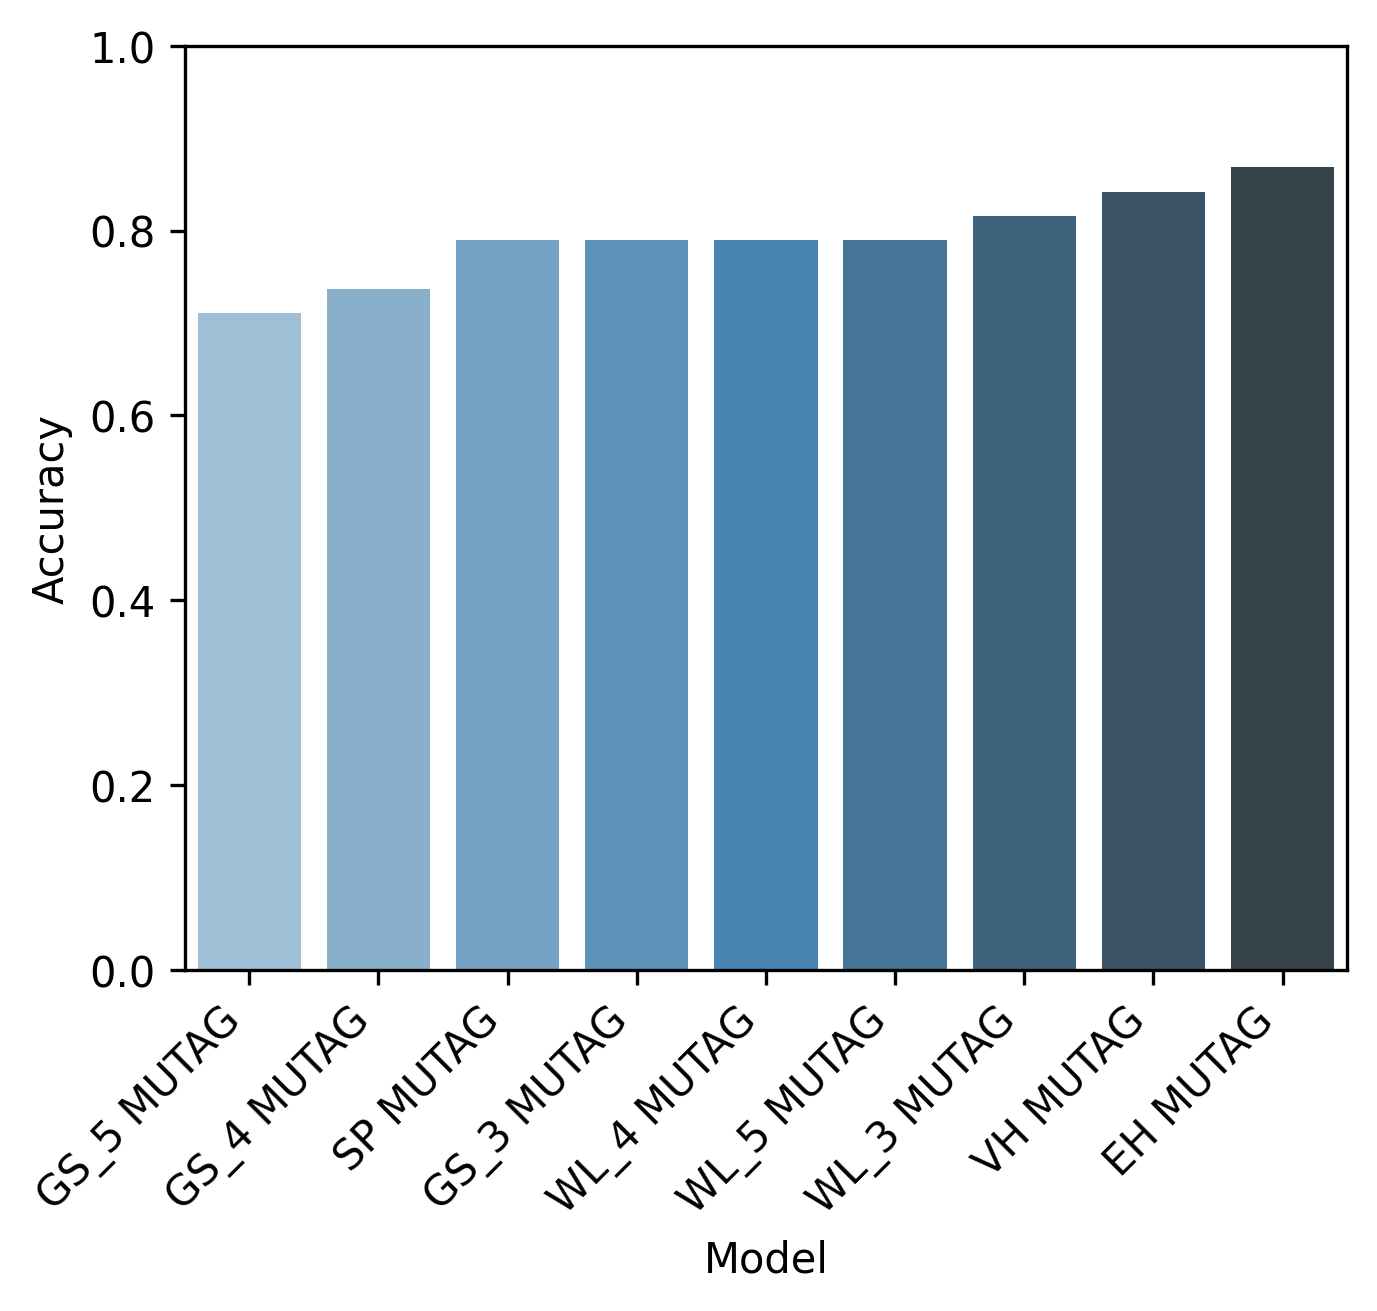

In [8]:
plt.figure(figsize=(5, 4), dpi=300)
ax = sns.barplot(x='Model', y='Accuracy', data=df_MUTAG, palette='Blues_d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylim(0, 1)
plt.savefig('./plots/result/MUTAG_accuracy.png', bbox_inches='tight')

In [26]:
# to save the confusion matrix in the plots/result/cm/ folder
for model in models_MUTAG.values(): model.evaluator.confusion_matrix()

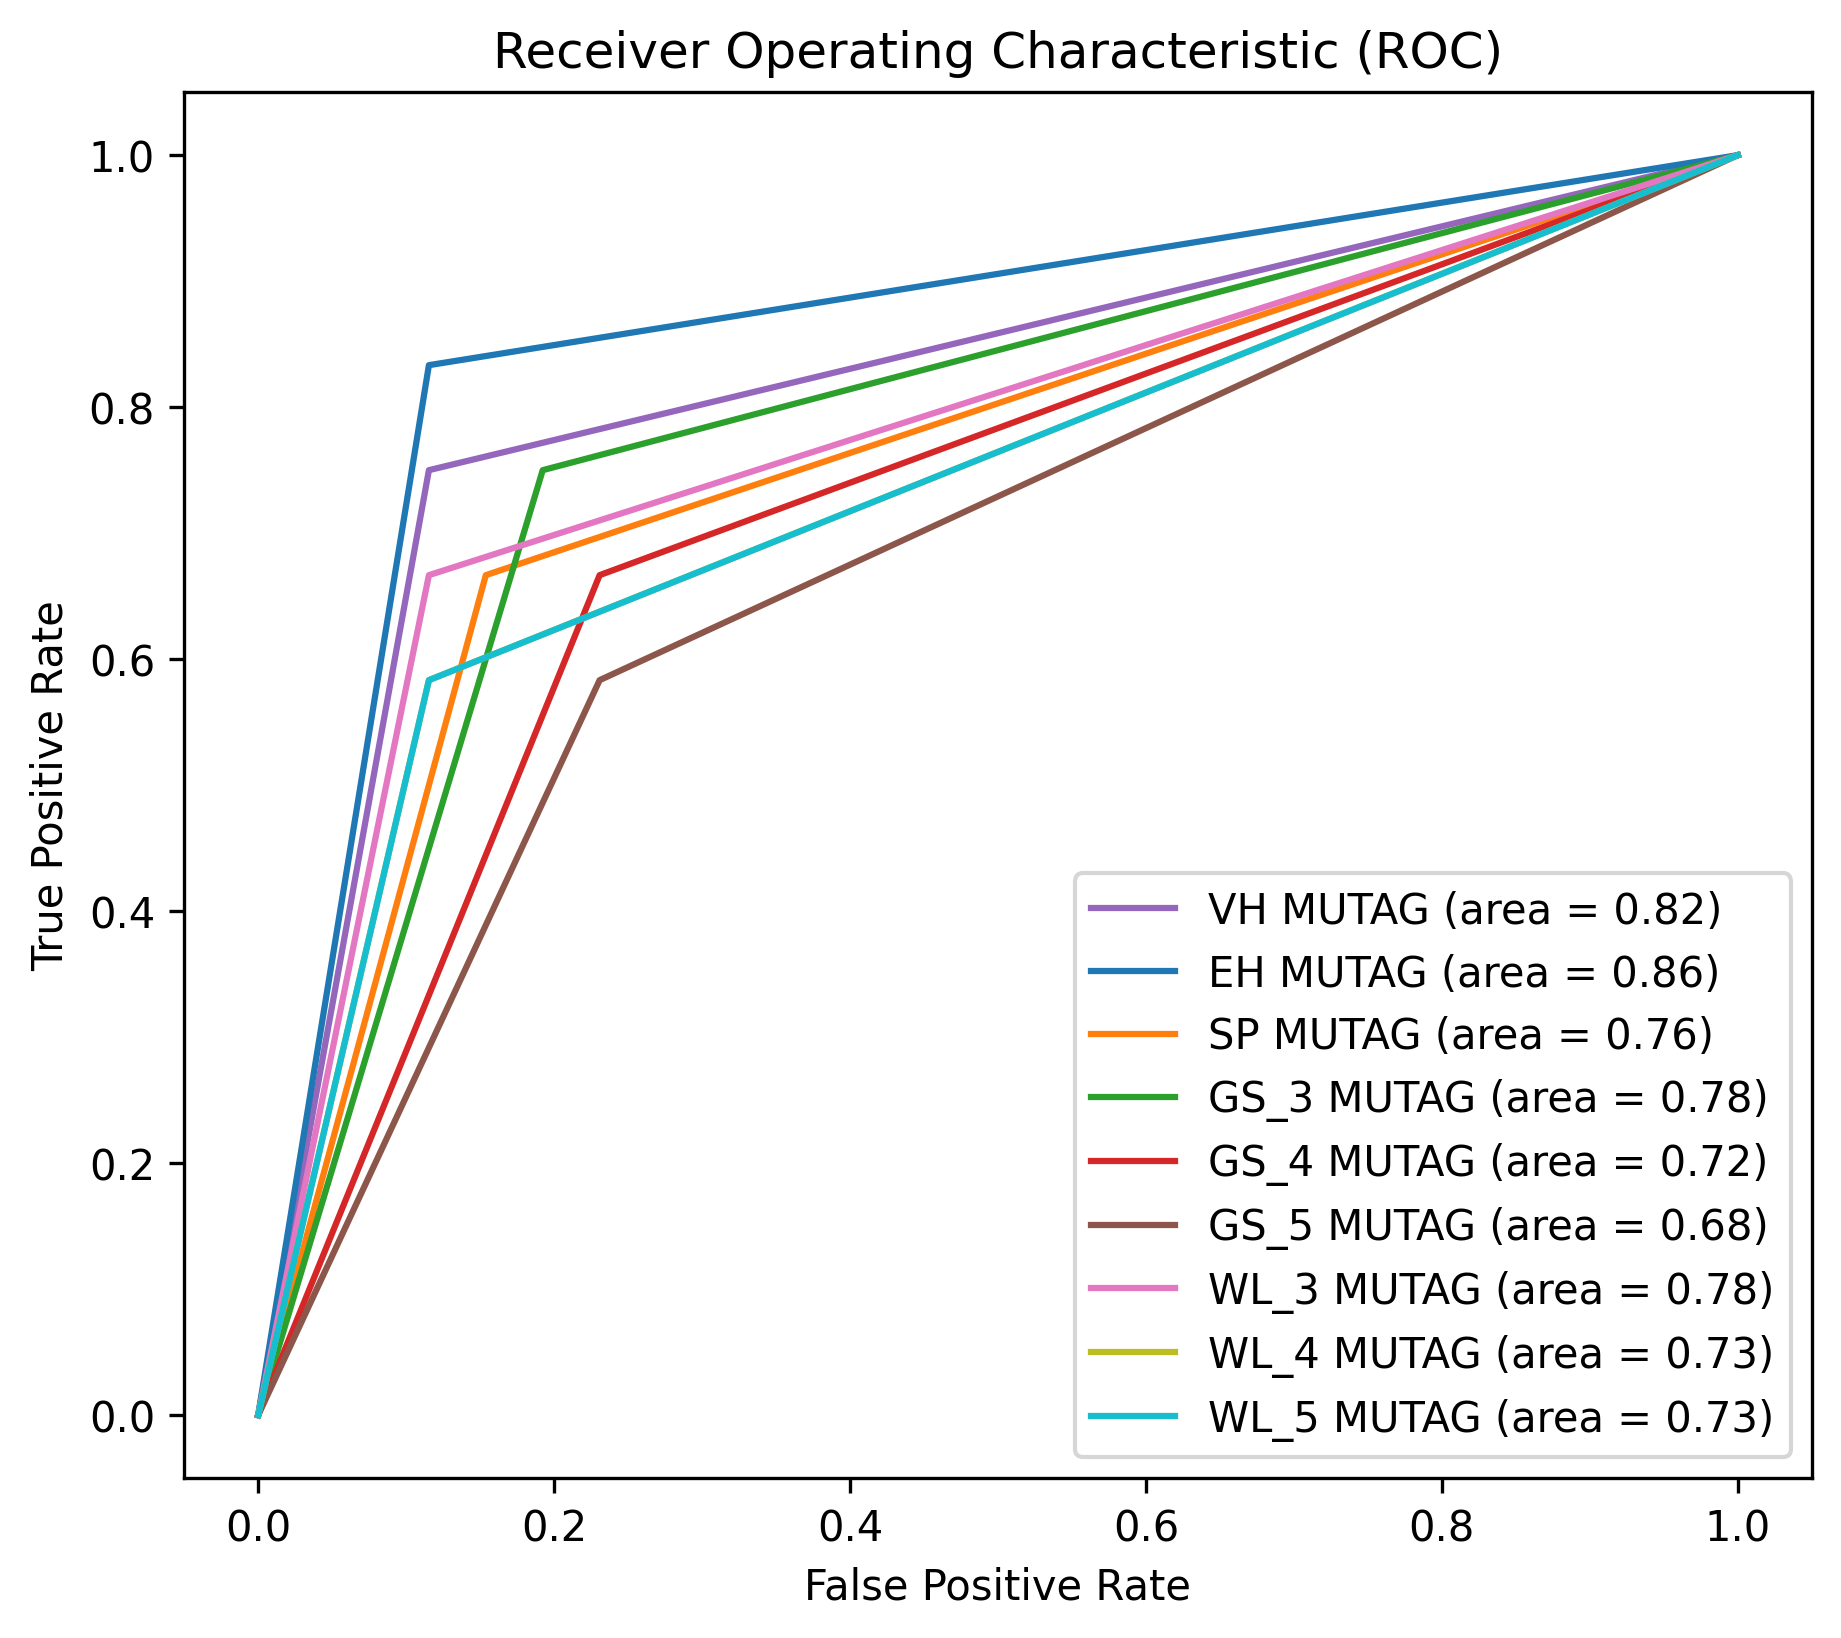

In [27]:
colors = ['tab:purple', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
plt.figure(figsize=(7, 6), dpi=300)
for color, model in zip(colors, models_MUTAG.values()): model.evaluator.roc_curve(plt, color)
plt.savefig('./plots/result/MUTAG_ROC.png', bbox_inches='tight')